In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('spotify.csv')

In [ ]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


**1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.Handle missing values and remove duplicate rows if necessary.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [ ]:
df.duplicated().sum()

27

In [ ]:
#remove duplicate row
df.drop_duplicates(inplace=True)

**2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

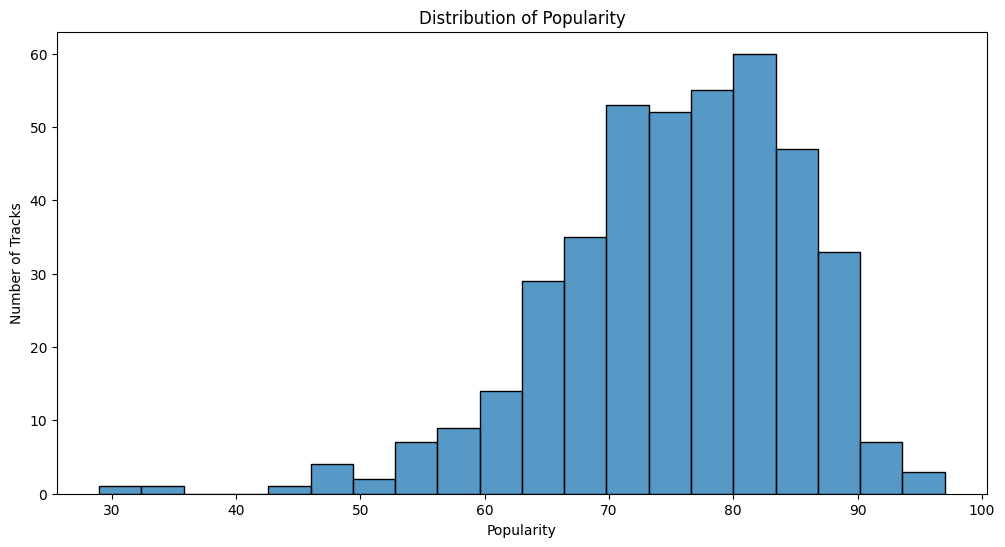

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Popularity')
plt.show()

**3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

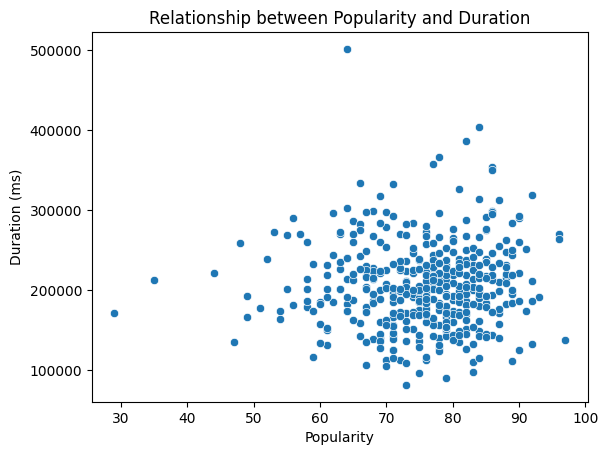

In [ ]:
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df)
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.title('Relationship between Popularity and Duration')
plt.show()

Yes there is relation between popularity and duration , as you see that most number od popularity is between 60 to 80 and duration is around to 200000.

**4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.**

In [ ]:
df.Artist.value_counts().head(10)

Artist
Drake           17
Eminem          11
Flo Rida        10
Ludacris        10
Timbaland       10
¥$              10
21 Savage       10
JAY-Z           10
Lil Nas X       10
Travis Scott     9
Name: count, dtype: int64

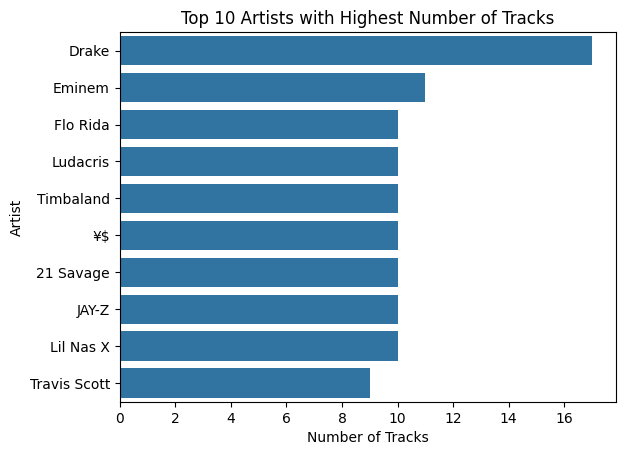

In [ ]:
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index[:10])
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Top 10 Artists with Highest Number of Tracks')
plt.show()

**5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [ ]:
df.sort_values(by='Popularity', ascending=True).head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


**6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

In [ ]:
df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

**7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [ ]:
top_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

top_tracks = df[df['Artist'].isin(top_artists)].groupby(['Artist', 'Track Name'])['Popularity'].mean().sort_values(ascending=False)

for artist in top_artists:
  print(f"\nMost popular tracks for {artist}:")
  print(top_tracks[artist].head(3))


Most popular tracks for cassö:
Track Name
Prada    92.0
Name: Popularity, dtype: float64

Most popular tracks for Trueno:
Track Name
Mamichula - con Nicki Nicole    89.0
Name: Popularity, dtype: float64

Most popular tracks for David Guetta:
Track Name
Baby Don't Hurt Me    87.0
Name: Popularity, dtype: float64

Most popular tracks for Travis Scott:
Track Name
FE!N (feat. Playboi Carti)    93.0
I KNOW ?                      92.0
MY EYES                       91.0
Name: Popularity, dtype: float64

Most popular tracks for ¥$:
Track Name
CARNIVAL    96.0
BURN        89.0
FUK SUMN    88.0
Name: Popularity, dtype: float64


**8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

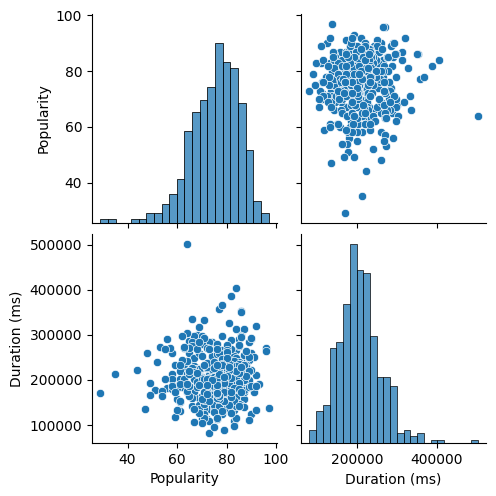

In [ ]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

**9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

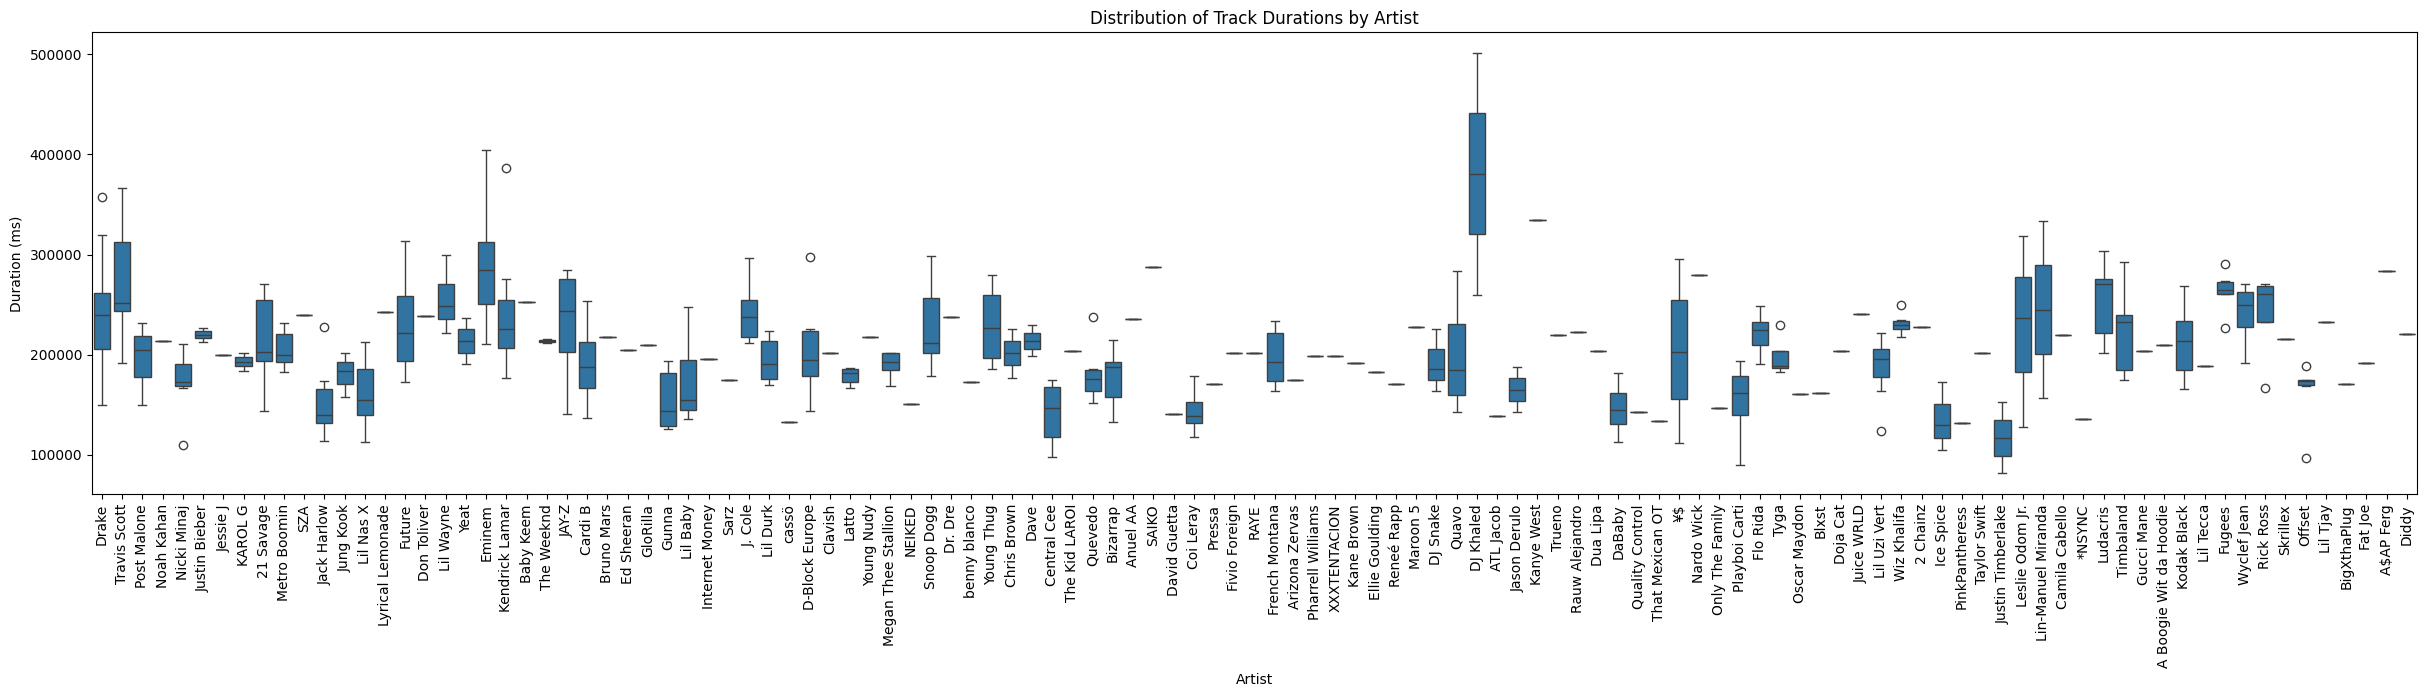

In [ ]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Distribution of Track Durations by Artist')
plt.xticks(rotation=90)
plt.show()

**10.How does the distribution of track popularity vary for different artists?Visualize this using a swarm plot or a violin plot.**

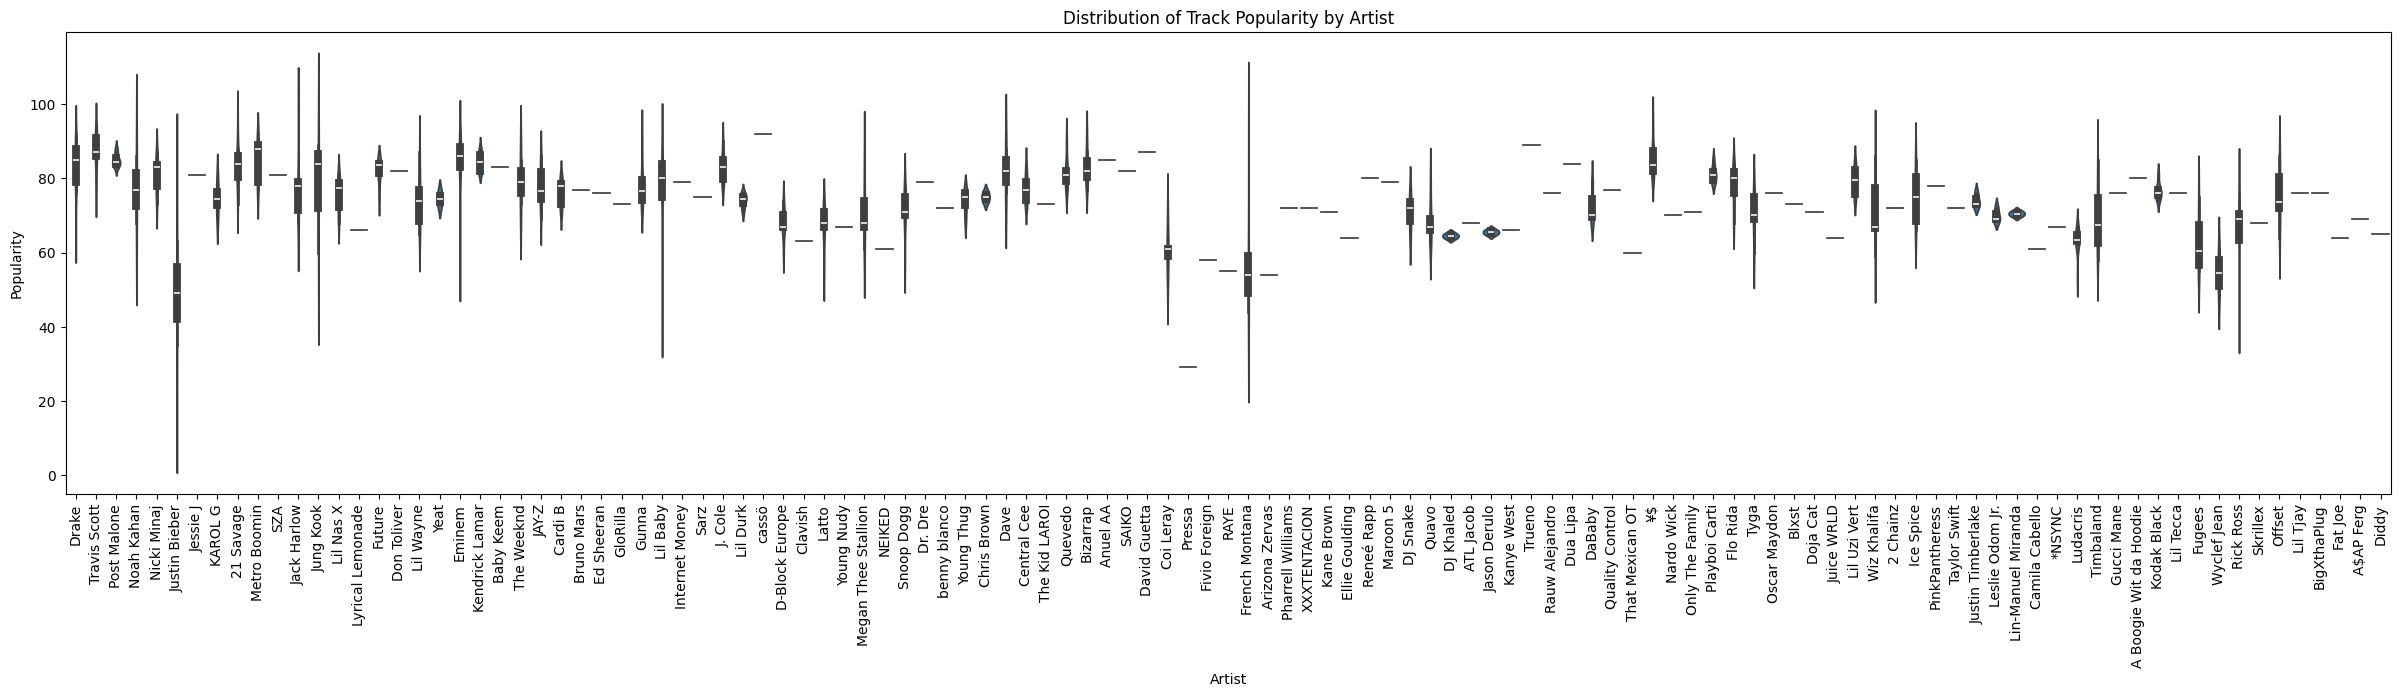

In [ ]:
plt.figure(figsize=(30, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity by Artist')
plt.xticks(rotation=90)
plt.show()